In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import json
import pickle
# import torch
import numpy as np
from Corpus import Corpus
from transformers import AutoTokenizer, AutoModel

# Load the configuration file
with open('config.json', 'r') as f:
    config = json.load(f)

# Load the Corpus object from the saved file
with open('data_vFF.pkl', 'rb') as f:
    corpus = pickle.load(f)

type(corpus)

In [ ]:
import pandas as pd
corpus_df = pd.DataFrame(corpus)

In [ ]:
df= corpus_df
df

In [ ]:
df.to_csv('final.csv',index=False)

In [ ]:
import numpy as np
import pandas as pd
import nltk

In [ ]:
data_frame = pd.read_csv('/content/drive/MyDrive/final.csv', usecols=['text', 'subjects'])
data_frame = data_frame.sample(n=300, random_state=42)
data_frame

,text,subjects
0,"['to header material.', '', '***', '', ""Lincol...",{'United States -- Politics and government -- ...
1,"['I have no lawful right to do so, and I have ...",{'United States -- Politics and government -- ...
2,['for a minority of their own will secede from...,{'United States -- Politics and government -- ...
3,"['in both cases, and a few break over in each....",{'United States -- Politics and government -- ...
4,['There is some difference of opinion whether ...,{'United States -- Politics and government -- ...
...,...,...
173102,"['the upper one, somewhat after the manner of ...",NaN
173103,['where the newly-born sun was just sinking in...,NaN
173104,"['And such a supper! Our host presided, and wh...",NaN
173105,"['himself, and you will lose him. Keep him in ...",NaN


In [ ]:
from sklearn.utils import shuffle

seed=42
data_frame = shuffle(data_frame,random_state=seed)
data_frame

,text,subjects
152204,"[""caught in the thicket,' to prevent the sacri...","{'Scott, Walter, 1771-1832', 'Authors, Scottis..."
44595,['me! and that my sharing or escaping the ruin...,"{'Inheritance and succession -- Fiction', 'You..."
153116,"[""exactly in the leader's tracks? If fifty Inj...","{'Hunters -- Juvenile fiction', 'Mexican War, ..."
135313,['herself five pictured cards of leading impor...,"{'Humorous stories', 'East Indians -- England ..."
73418,"['""What!""', '', '""Have you seen Wallie Torbin ...",{'Fiction'}
...,...,...
7438,"["" Now, for not looking on a woman's face,""...","{'Navarre (Kingdom) -- Drama', 'Courts and cou..."
63097,"['', '(In the Luxembourg Gardens, at the group...","{'Strindberg, August, 1849-1912 -- Translation..."
41622,"['battle.', '', 'Probably he won’t forget it. ...","{'World War, 1914-1918'}"
135600,"['once more caught her breath.', '', 'Dane, be...","{'Magicians -- Fiction', 'British -- Africa --..."


### Apply Label Encoding on the Books' subjects

In [ ]:
# from sklearn.preprocessing import LabelEncoder

# # Select the top 10 subjects and their counts
# top_subjects = data_frame['subjects'].value_counts().head(10)

# # Initialize LabelEncoder and fit on the top 10 subjects
# label_encoder = LabelEncoder()
# label_encoder.fit(top_subjects.index)

# top_subjects

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
y_actual= label_encoder.fit_transform(data_frame['subjects'])
data_frame['subjects']=y_actual

# Word Embedding

## BOW

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
BOW = CountVectorizer()
BOW_transformation = BOW.fit_transform(data_frame['text'])

## TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
def tfidf_ngram(n_gram,X_train=data_frame['text']):
    vectorizer = TfidfVectorizer(ngram_range=(n_gram,n_gram))
    x_train_vec = vectorizer.fit_transform(X_train)
    return x_train_vec

#### Applying tfidf with 1-gram, 2-gram and 3-gram

In [ ]:
# Applying tfidf with 1-gram, and 2-gram
tfidf_1g_transformation= tfidf_ngram(1,X_train=data_frame['text'])
tfidf_2g_transformation= tfidf_ngram(2,X_train=data_frame['text'])

## Doc2Vec


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
#Import packages
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
# Tokenization of each document
tokenized_doc = []
for d in data_frame['text']:
    tokenized_doc.append(word_tokenize(d.lower()))

# Convert tokenized document into gensim formated tagged data
tagged_data = [TaggedDocument(d, [i]) for i, d in enumerate(tokenized_doc)]
tagged_data[0]

TaggedDocument(words=['[', '``', 'caught', 'in', 'the', 'thicket', ',', "'", 'to', 'prevent', 'the', 'sacrifice', 'of', 'that', 'people', '.', '``', ',', '``', ',', "'", "''", 'the', 'few', 'friends', 'who', 'may', 'see', 'this', 'journal', 'are', 'much', 'indebted', 'for', 'these', "'", ',', "'pathetic", 'remarks', 'to', 'the', 'situation', 'under', 'which', 'they', 'are', 'recorded', ';', 'for', "'", ',', "'since", 'we', 'left', 'the', 'lighthouse', 'we', 'have', 'been', 'struggling', 'with', 'adverse', 'wind', "'", ',', "'", '(', 'pretty', 'high', 'too', ')', ',', 'and', 'a', 'very', 'strong', 'tide', ',', 'called', 'the', 'rost', 'of', 'the', "'", ',', "'start", ',', 'which', ',', 'like', 'sumburgh', 'rost', ',', 'bodes', 'no', 'good', 'to', 'our', 'roast', 'and', "'", ',', "'boiled", '.', 'the', 'worst', 'is', 'that', 'this', 'struggle', 'carries', 'us', 'past', 'a', 'most', 'curious', "'", ',', "'spectacle", ',', 'being', 'no', 'less', 'than', 'the', 'carcases', 'of', 'two', 'hun

In [ ]:
# Train doc2vec model
model = Doc2Vec(tagged_data, vector_size=50, window=2, min_count=1, workers=4, epochs = 100)

In [ ]:
def get_doc2vec_vector(df):
    doc2vec_vectors=[]
    for sentence in data_frame['text']:
        doc2vec_vectors.append(model.infer_vector(word_tokenize(sentence.lower())))
    return doc2vec_vectors
doc2vec_vectors=get_doc2vec_vector(data_frame['text'])
len(doc2vec_vectors)

300

## Using BERT as pretrained model

In [ ]:
# Check the GPU
import torch
# If there's a GPU available...
if torch.cuda.is_available():
    # Tell PyTorch to use the GPU.
    device = torch.device("cuda")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: NVIDIA A100-SXM4-40GB


In [ ]:
# pip install keras_preprocessing

In [ ]:
# Import Libraries
import tensorflow as tf
import torch
from torch.utils.data import TensorDataset, DataLoader
from transformers import BertTokenizer, BertModel
from keras_preprocessing.sequence import pad_sequences
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Create sentence and label lists
sentences = data_frame['text'].values

# We need to add special tokens at the beginning and end of each sentence for BERT to work properly
sentences = ["[CLS] " + sentence + " [SEP]" for sentence in sentences]
labels = data_frame.subjects.values

# Initialize the tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# Tokenize the sentences and put them in the list tokenized_texts
tokenized_texts = [tokenizer.tokenize(sent) for sent in sentences]
# Set the maximum sequence length. The longest sequence in our training set is 47, but we'll leave room on the end anyway.
# In the original paper, the authors used a length of 512.
MAX_LEN = 128
# Use the BERT tokenizer to convert the tokens to their index numbers in the BERT vocabulary
input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]
# Pad our input tokens
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")
# Create attention masks
attention_masks = []
hidden_states=[]
# Create a mask of 1s for each token followed by 0s for padding
for seq in input_ids:
    seq_mask = [float(i>0) for i in seq]
    attention_masks.append(seq_mask)
# Conver the ids into a tensor representation
batch_size = 4
input_tensor = torch.tensor(input_ids)
masks_tensor = torch.tensor(attention_masks)
train_data = TensorDataset(input_tensor, masks_tensor)
dataloader = DataLoader(train_data, batch_size=batch_size)
# Initialize the model
if torch.cuda.is_available():
    model = BertModel.from_pretrained("bert-base-uncased",output_hidden_states = True,).to('cuda')
else:
    model = BertModel.from_pretrained("bert-base-uncased",output_hidden_states = True,).to('cpu')
model.eval()
outputs = []

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
for input, masks in dataloader:
    torch.cuda.empty_cache() # empty the gpu memory
    # Transfer the batch to gp
    if torch.cuda.is_available():
        input = input.to('cuda')
        masks = masks.to('cuda')
    # Run inference on the batch
    output = model(input, attention_mask=masks)
    # Transfer the output to CPU again and convert to numpy
    output = output[0].cpu().detach().numpy()
    # Store the output in a list
    outputs.append(output)
# Concatenate all the lists within the list into one list
outputs = [x for y in outputs for x in y]

**Embed the full sectence by taking the mean of the embedding vectors of the tokenized words**

In [ ]:
bert_vectors=np.array(outputs)
bert_vectors=bert_vectors.mean(axis=1)
bert_vectors.shape

(300, 768)

## Helper function

In [ ]:
import gensim.downloader as api
def get_vectors_pretrained(df, model):
    embedding_vectors = []
    for partition in df['text']:
        sentence = []
        for word in partition.split(' '):
            try:
                sentence.append(model[word])
            except:
                pass
        sentence = np.array(sentence)
        sentence = sentence.mean(axis=0)
        embedding_vectors.append(sentence)
    embedding_vectors = np.array(embedding_vectors)
    return embedding_vectors

## Glove

In [ ]:
# import gensim.downloader as api
# glove_model = api.load("glove-wiki-gigaword-300")  # load glove vectors
# glove_vectors=get_vectors_pretrained(data_frame,glove_model)
# glove_vectors

## Fast text

In [ ]:
import gensim.downloader as api
fast_text_model = api.load("fasttext-wiki-news-subwords-300")  # load glove vectors
fast_text_vectors=get_vectors_pretrained(data_frame,fast_text_model)
fast_text_vectors

array([[-0.00172053, -0.0008783 ,  0.01838887, ..., -0.00492102,
        -0.01027104,  0.00347254],
       [-0.01164394,  0.01596081,  0.01247824, ..., -0.00908884,
        -0.01484321, -0.00249422],
       [-0.00298642,  0.00385083,  0.00393565, ..., -0.00630793,
        -0.00787115, -0.00867691],
       ...,
       [ 0.00048359,  0.00584779,  0.02263483, ..., -0.00724204,
        -0.00489787, -0.00703513],
       [-0.00557458,  0.01226238,  0.01802889, ..., -0.006219  ,
         0.00220413, -0.00034993],
       [-0.00847671,  0.00989531,  0.01775458, ..., -0.00275604,
        -0.00890432, -0.00279935]], dtype=float32)

In [ ]:
## Word2Vec

In [ ]:
import gensim.downloader as api
word2vec_model = api.load("word2vec-google-news-300")  # load glove vectors
word2vec_vectors = get_vectors_pretrained(data_frame,word2vec_model)
word2vec_vectors

array([[ 0.02261589,  0.05530676,  0.03136837, ..., -0.01226973,
         0.05884682, -0.0160406 ],
       [ 0.04920681, -0.00293334,  0.06118057, ..., -0.07439839,
         0.01465509, -0.03537871],
       [ 0.04115058,  0.03777659,  0.04867788, ..., -0.0638598 ,
         0.02890331, -0.05441947],
       ...,
       [ 0.05809908,  0.04610448,  0.05638033, ..., -0.03808342,
         0.04194426, -0.03549956],
       [ 0.05567444,  0.0326736 ,  0.02920392, ..., -0.02999065,
         0.06021084, -0.03634163],
       [ 0.05533849,  0.03958585,  0.0439728 , ..., -0.04059145,
         0.04608069, -0.02815207]], dtype=float32)

## LDA

In [ ]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel
import matplotlib.pyplot as plt
import gensim

paragraphs = data_frame["text"].to_list()
docs = []

for sen in paragraphs:
    docs.append(list(sen.split()))
print(len(docs))

# Create a dictionary representation of the documents.
dictionary = Dictionary(docs)

# Filter out words that occur less than 20 documents, or more than 50% of the documents.
dictionary.filter_extremes(no_below=20, no_above=0.8)

# Bag-of-words representation of the documents.
corpus = [dictionary.doc2bow(doc) for doc in docs]
print(len(corpus[2]))
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))


300
101
Number of unique tokens: 496
Number of documents: 300


In [ ]:
# Set training parameters.
num_topics = 5
chunksize = 2000
passes = 20
iterations = 400
eval_every = None  # Don't evaluate model perplexity, takes too much time.

# Make a index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token
#print(len(dictionary))
model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every
)

top_topics = model.top_topics(corpus) #, num_words=20)

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
print('Average topic coherence: %.4f.' % avg_topic_coherence)

Average topic coherence: -0.6042.


In [ ]:
all_topics = model.get_document_topics(corpus)
num_docs = len(all_topics)

all_topics_csr = gensim.matutils.corpus2csc(all_topics)
lda_to_cluster = all_topics_csr.T.toarray()
lda_to_cluster.shape

(300, 5)

#### Measure the coherence per topic of the LDA model

In [ ]:
from gensim.models.coherencemodel import CoherenceModel
## Evaluating coherence of gensim LDA model
cm = CoherenceModel(model=model, corpus=corpus, coherence='u_mass')
coherence_score = cm.get_coherence()
print(coherence_score)

-0.6041998506563215


# Word embedding dictionary

In [ ]:
text_embedding={
    'BOW':BOW_transformation.toarray(),
    'TF_IDF 1_gram':tfidf_1g_transformation.toarray(),
    'Doc2vec':np.array(doc2vec_vectors),
    # 'Glove':glove_vectors,
    'FastText':fast_text_vectors,
    'Word2vec':word2vec_vectors,
    'BERT':bert_vectors,
    'LDA':lda_to_cluster,
}

### Save word Embedding as a pickle file

In [ ]:
import pickle
a_file = open("EmbeddingText_edited.pkl", "wb")
pickle.dump(text_embedding, a_file)
a_file.close()
print('Saved')

Saved


In [ ]:
for key in embedding.keys():
    print(f"Key: {key}, Shape: {embedding[key].shape}")
    

Key: BOW, Shape: (300, 2)
Key: TF_IDF 1_gram, Shape: (300, 13699)
Key: Doc2vec, Shape: (300, 50)
Key: FastText, Shape: (300, 300)
Key: Word2vec, Shape: (300, 300)
Key: BERT, Shape: (300, 768)
Key: LDA, Shape: (300, 5)


In [ ]:
# Word embedding visualization

In [ ]:
import plotly.express as px
from sklearn.decomposition import PCA
pca=PCA(n_components=2,)
embedding=text_embedding.copy()

for key in embedding.keys():
    embedding[key]=pca.fit_transform(embedding[key])
    df=pd.DataFrame({'PCA1':embedding[key][:,0],'PCA2':embedding[key][:,1],'Target':y_actual})
    fig = px.scatter(data_frame =df, x='PCA1', y='PCA2', color='Target')
    fig.update_layout(title={'text':f'{key}','x':0.5},height=500,width=700)
    fig.show()

In [ ]:
import plotly.express as px
from sklearn.decomposition import PCA
pca = PCA(n_components=2,)
embedding = text_embedding.copy()

for key in embedding.keys():
    # check shape of embedding[key]
    if embedding[key].ndim != 2:
        embedding[key] = embedding[key].reshape(embedding[key].shape[0], -1)
    embedding[key] = pca.fit_transform(embedding[key])
    df=pd.DataFrame({'PCA1':embedding[key][:,0],'PCA2':embedding[key][:,1],'Target':y_actual})
    fig = px.scatter(data_frame =df, x='PCA1', y='PCA2', color='Target')
    fig.update_layout(title={'text':f'{key}','x':0.5},height=500,width=700)
    fig.show()


# Mapping function

In [ ]:
def label_mapping(num, y_actual, y_target, df_labels):
    if num == df_labels[df_labels[y_actual]==0][y_target].value_counts().idxmax():
        return 0
    if num == df_labels[df_labels[y_actual]==1][y_target].value_counts().idxmax():
        return 1
    if num == df_labels[df_labels[y_actual]==2][y_target].value_counts().idxmax():
        return 2
    if num == df_labels[df_labels[y_actual]==3][y_target].value_counts().idxmax():
        return 3
    if num ==df_labels[df_labels[y_actual]==4][y_target].value_counts().idxmax():
        return 4
    else :
        return num

In [ ]:
def lab(df):
    for i in range(5):
        cluster_idx=df[df['y_pred']==i].index.to_list()
        if len(cluster_idx)>0:
            right_cluster=df.loc[cluster_idx,'y_actual'].mode()[0]
            df['y_pred']=df['y_pred'].apply(lambda x: right_cluster+1000 if x==i else x)
    return df

# Clustering

## K-Means

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
import pandas as pd
import nltk
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
import warnings
from sklearn.metrics import cohen_kappa_score
warnings.filterwarnings('ignore')

In [ ]:
text_embedding.keys()

dict_keys(['BOW', 'TF_IDF 1_gram', 'Doc2vec', 'FastText', 'Word2vec', 'BERT', 'LDA'])

In [ ]:
# function to apply k-means by passing the maximum number of clusters and the data
# Retrieving two dictionaries; first one has each K-value with its wcss and the latter has each K-value with its silhouette score
def run_KMeans(max_k, data):
    max_k+=1
    kmeans_elb_results = dict()
    kmeans_sil_results = dict()
    for k in range(2 , max_k):
        kmeans = KMeans(n_clusters = k
                        , init = 'k-means++'
                        , n_init = 10
                        , max_iter=300
                        , random_state = seed
                        , algorithm = 'full')
        kmeans.fit(data)
        kmeans_elb_results.update( {k : kmeans.inertia_} )
        kmeans_sil_results.update({k:silhouette_score(data, kmeans.labels_)})

    return  kmeans_elb_results, kmeans_sil_results

In [ ]:
# Creating dictionary of each k-values for each vectorizer
seed = 42
kmeans_elb_vec = dict()
kmeans_sil_vec = dict()
for k,v in text_embedding.items():
    kmeans_elb_results, kmeans_sil_results = run_KMeans(10, v)
    kmeans_elb_vec[k] = kmeans_elb_results
    kmeans_sil_vec[k] = kmeans_sil_results

### Use the Elbow Method to get the best number of clusters.

In [ ]:
fig = make_subplots(rows=3, cols=3,horizontal_spacing=0.1,vertical_spacing=0.1);
i=j=1
for elb_vec_key, elb_vec_value in kmeans_elb_vec.items():
    fig.add_trace(
        go.Scatter(
            x=list(elb_vec_value.keys()),
            y=list(elb_vec_value.values()),
            mode='lines',
            name=elb_vec_key,
        ),row=i, col=j)
    j+=1
    if j == 4:
        j=1
        i+=1
fig.update_layout(height=1000, width=1000,title={'text':'K Means for each vectorizer using Elbow Method','x':0.5})
fig.show()

### Use the Silhouette Method to get the best number of clusters.

In [ ]:
fig = make_subplots(rows=3, cols=3,horizontal_spacing=0.1,vertical_spacing=0.1);
i=j=1
for sil_vec_key, sil_vec_value in kmeans_sil_vec.items():
    fig.add_trace(
        go.Scatter(
            x=list(sil_vec_value.keys()),
            y=list(sil_vec_value.values()),
            mode='lines',
            name=sil_vec_key,
        ),row=i, col=j)
    j+=1
    if j == 4:
        j=1
        i+=1
fig.update_layout(height=1000, width=1000,title={'text':'K Means for each vectorizer using Silhouette Method','x':0.5})
fig.show()

### Choose the best Word embedding technique based on the highest Cohen's Kappa score at k =5

In [ ]:
vecs = list(text_embedding.keys())
vec_kappa = dict()
for vec in vecs:
    kmeans_doc2vec = KMeans(n_clusters = 5
                            , init = 'k-means++'
                            , n_init = 10
                            , max_iter=300
                            , random_state = seed
                            , algorithm = 'full')
    kmeans_doc2vec.fit(text_embedding[vec])
    y_pridect = kmeans_doc2vec.predict(text_embedding[vec])
    y_df = pd.DataFrame({'y_actual':y_actual, 'y_pred':y_pridect})
    y_df['y_pred'] = y_df['y_pred'].apply(lambda val: label_mapping(num=val, y_actual ='y_actual', y_target='y_pred', df_labels=y_df))
    # y_df['y_pred']=y_df['y_pred'].apply(lambda x : x-1000 if x > 20 else x)
    # y_df=lab(y_df)
    kappa_score = cohen_kappa_score(y_df['y_actual'], y_df['y_pred'])
    vec_kappa[vec] = kappa_score
vec_kappa

{'BOW': 0.006688963210702337,
 'TF_IDF 1_gram': 0.0033444816053511683,
 'Doc2vec': 0.0033444816053511683,
 'FastText': 0.006688963210702004,
 'Word2vec': 0.006688963210702337,
 'BERT': 0.006688963210702337,
 'LDA': 0.010033444816053505}

In [ ]:
fig = go.Figure()
obj = go.Bar(x = list(vec_kappa.keys()), y = list(vec_kappa.values()))
fig.add_trace(obj)
fig.update_layout(title={'text':'Kappa Score for Different Vectorizers','x':0.5},height=600,width=600)
fig.show()

### Clusters Visualization

#### applying pca

In [ ]:
from sklearn.decomposition import PCA

def apply_PCA(data):
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(data)
    principalDf = pd.DataFrame(data = principalComponents
                               , columns = ['principal component 1', 'principal component 2'])
    return principalDf
pca_df = apply_PCA(text_embedding['Doc2vec'])
pca_df_final = pd.concat([pca_df, pd.Series(y_actual,name='target')],axis=1)
pca_df_final

,principal component 1,principal component 2,target
0,1.433685,7.960153,168
1,6.871742,-2.970331,112
2,-6.300544,3.686512,107
3,3.395583,-3.632623,106
4,-8.767295,-3.210585,74
...,...,...,...
295,5.020466,5.070008,133
296,-0.465735,4.650551,190
297,6.096864,2.285667,224
298,1.564096,-4.949335,125


#### Apply K-Means on the PCA transformed data

In [ ]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', n_init = 10, max_iter=300, random_state = seed, algorithm = 'full')
kmeans.fit(pca_df)
kmeans_labels = kmeans.predict(pca_df)
kmeans_df_final = pd.concat([pca_df, pd.Series(kmeans_labels,name='target')],axis=1)
centroids = kmeans.cluster_centers_
kmeans_df_final

,principal component 1,principal component 2,target
0,1.433685,7.960153,3
1,6.871742,-2.970331,0
2,-6.300544,3.686512,4
3,3.395583,-3.632623,0
4,-8.767295,-3.210585,1
...,...,...,...
295,5.020466,5.070008,3
296,-0.465735,4.650551,4
297,6.096864,2.285667,2
298,1.564096,-4.949335,0


#### Map the predicted clusters to the proper Labels

In [ ]:
df_labels1 = pd.DataFrame({'Labels':pca_df_final['target'], 'Predicted Labels': list(kmeans_df_final['target']) })
df_labels1['Predicted Labels'] = df_labels1['Predicted Labels'].apply(lambda val: label_mapping(num=val, y_actual ='Labels', y_target='Predicted Labels', df_labels=df_labels1))
kmeans_df_final['target'] = df_labels1['Predicted Labels']

In [ ]:
from plotly.subplots import make_subplots
fig1 = px.scatter(data_frame =pca_df_final, x='principal component 1', y='principal component 2', color='target')
fig1.update_layout({'title':{'text': 'The Clusters with Actual Labels','x':0.5}},height=600,width=600)
fig1.show()
fig2 = px.scatter(data_frame =kmeans_df_final, x='principal component 1', y='principal component 2', color='target')
fig2.update_layout(annotations=[
    dict(
        font=dict(color='black',size=30),
        showarrow=False,
        x=centroids[0][0],
        y=centroids[0][1],
        text="X"),
    dict(
        font=dict(color='black',size=30),
        showarrow=False,
        x=centroids[1][0],
        y=centroids[1][1],
        text="X",
    ),
    dict(font=dict(color='black',size=30),
         showarrow=False,
         x=centroids[2][0],
         y=centroids[2][1],
         text="X",
         ),
    dict(
        font=dict(color='black',size=30),
        showarrow=False,
        x=centroids[3][0],
        y=centroids[3][1],
        text="X",
    ),dict(
        font=dict(color='black',size=30),
        showarrow=False,
        x=centroids[4][0],
        y=centroids[4][1],
        text="X",
    )],height=600,width=600)
fig2.update_layout({'title':{'text': 'The Clusters with K-means','x':0.5},},height=600,width=600)
fig2.show()

## Expectation Maximization (EM)

EM clustering is to estimate the means and standard deviations for each cluster to maximize the likelihood of the observed data.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
y_df = pd.DataFrame({'y_actual':y_actual,'y_pred':y_actual})

#### **Important Note:** for BOW and TF_IDF we should perform PCA to decrease number of features

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=300,)
text_embedding_pca=text_embedding.copy()
text_embedding_pca['BOW']=pca.fit_transform(text_embedding['BOW'])
text_embedding_pca['TF_IDF 1_gram']=pca.fit_transform(text_embedding['TF_IDF 1_gram'])

#### Use the Silhouette Method to get the best number of clusters.

In [ ]:
from sklearn.metrics import silhouette_score,cohen_kappa_score
n_clusters = np.arange(2,10)

silhouette_for_each_transformation=text_embedding_pca.copy()
for key in silhouette_for_each_transformation.keys():
    silhouette_for_each_transformation[key]=[]

bic_for_each_transformation=text_embedding_pca.copy()
for key in bic_for_each_transformation.keys():
    bic_for_each_transformation[key]=[]


labels_for_each_transformation=text_embedding_pca.copy()
for key in labels_for_each_transformation.keys():
    labels_for_each_transformation[key]=[]

kappa_for_each_transformation=text_embedding_pca.copy()

y_df = pd.DataFrame({'y_actual':y_actual,'y_pred':y_actual})
for key in text_embedding_pca.keys():
    silhouette_scores=[]
    bic=[]
    aic=[]
    kappa_at_5=[]
    labels_list=[]
    for n in n_clusters :
        model=GaussianMixture(n, covariance_type='full', random_state=seed)
        labels=model.fit_predict(text_embedding_pca[key])
        silhouette_scores.append(silhouette_score(text_embedding_pca[key],labels=labels))
        if n==5 :
            y_df['y_pred']=labels
            y_df['y_pred']=y_df['y_pred'].apply(lambda row: label_mapping(num=row,y_actual = 'y_actual',y_target='y_pred',df_labels=y_df ))
            y_df['y_pred']=y_df['y_pred'].apply(lambda x: x-1000 if x>20 else x)
            right_labels_mapping=y_df['y_pred']
            kappa_at_5=cohen_kappa_score(y_actual,right_labels_mapping )
        bic.append(model.bic(text_embedding_pca[key]))
        labels_list.append(labels)
    silhouette_for_each_transformation[key].append(silhouette_scores)
    bic_for_each_transformation[key].append(bic)
    kappa_for_each_transformation[key]=kappa_at_5
    labels_for_each_transformation[key].append(labels_list)

In [ ]:
idx=[(1,1),(1,2),(1,3),(2,1),(2,2),(2,3),(3,1),(3,2),(3,3)]
fig = make_subplots(rows=3, cols=3,horizontal_spacing=0.1,vertical_spacing=0.1);
count=0
for key in silhouette_for_each_transformation.keys() :
    silhouette_scores=list(silhouette_for_each_transformation[key][0])
    fig.add_trace(
        go.Scatter(
            x=list(n_clusters),
            y=list(silhouette_scores),
            mode='lines',
            name=key,
        ),row=idx[count][0], col=idx[count][1])
    count+=1
fig.update_layout(height=1000, width=1000,title={'text':'Trying different K values to each transformation method and check the Silhouette score','x':0.5})
fig.show()

### Check kappa scores when k =5 with all transformations

In [ ]:
kappa_for_each_transformation

{'BOW': 0.006688963210702337,
 'TF_IDF 1_gram': 0.0033444816053511683,
 'Doc2vec': 0.006688963210702115,
 'FastText': 0.006688963210702004,
 'Word2vec': 0.0033444816053511683,
 'BERT': 0.006688963210702337,
 'LDA': 0.0033444816053509463}

In [ ]:
fig = go.Figure()
obj = go.Bar(x = list(kappa_for_each_transformation.keys()), y = list(kappa_for_each_transformation.values()))
fig.add_trace(obj)
fig.update_layout(title={'text':'Kappa Score for Different Vectorizers','x':0.5},height=600,width=600)
fig.show()

### Using PCA with the highest silhouette score to visualize clusters

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2,)
embedding=text_embedding.copy()
key='Doc2vec'
embedding[key]=pca.fit_transform(embedding[key])
df=pd.DataFrame({'PCA1':embedding[key][:,0],'PCA2':embedding[key][:,1],'Target':labels_for_each_transformation[key][0][3]})
fig = px.scatter(data_frame =df, x='PCA1', y='PCA2', color='Target')
fig.update_layout(title={'text':f'{key}','x':0.5},height=500,width=500)
fig.show()

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2,)
embedding=text_embedding.copy()
key='LDA'
embedding[key]=pca.fit_transform(embedding[key])
df=pd.DataFrame({'PCA1':embedding[key][:,0],'PCA2':embedding[key][:,1],'Target':labels_for_each_transformation[key][0][3]})
fig = px.scatter(data_frame =df, x='PCA1', y='PCA2', color='Target')
fig.update_layout(title={'text':f'{key}','x':0.5},height=500,width=500)
fig.show()

In [ ]:
## Hierarchical

In [ ]:
from numpy import unique
from numpy import where
from matplotlib import pyplot
from yellowbrick.text import TSNEVisualizer
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

def plot_cluster(model,X):
    yhat = model.fit_predict(X)
    clusters = unique(yhat)

    tsne = TSNEVisualizer(random_state=seed)
    tsne.fit(X, yhat)
    tsne.show()

In [ ]:
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import Birch
from sklearn.cluster import DBSCAN
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import OPTICS
from sklearn.cluster import SpectralClustering

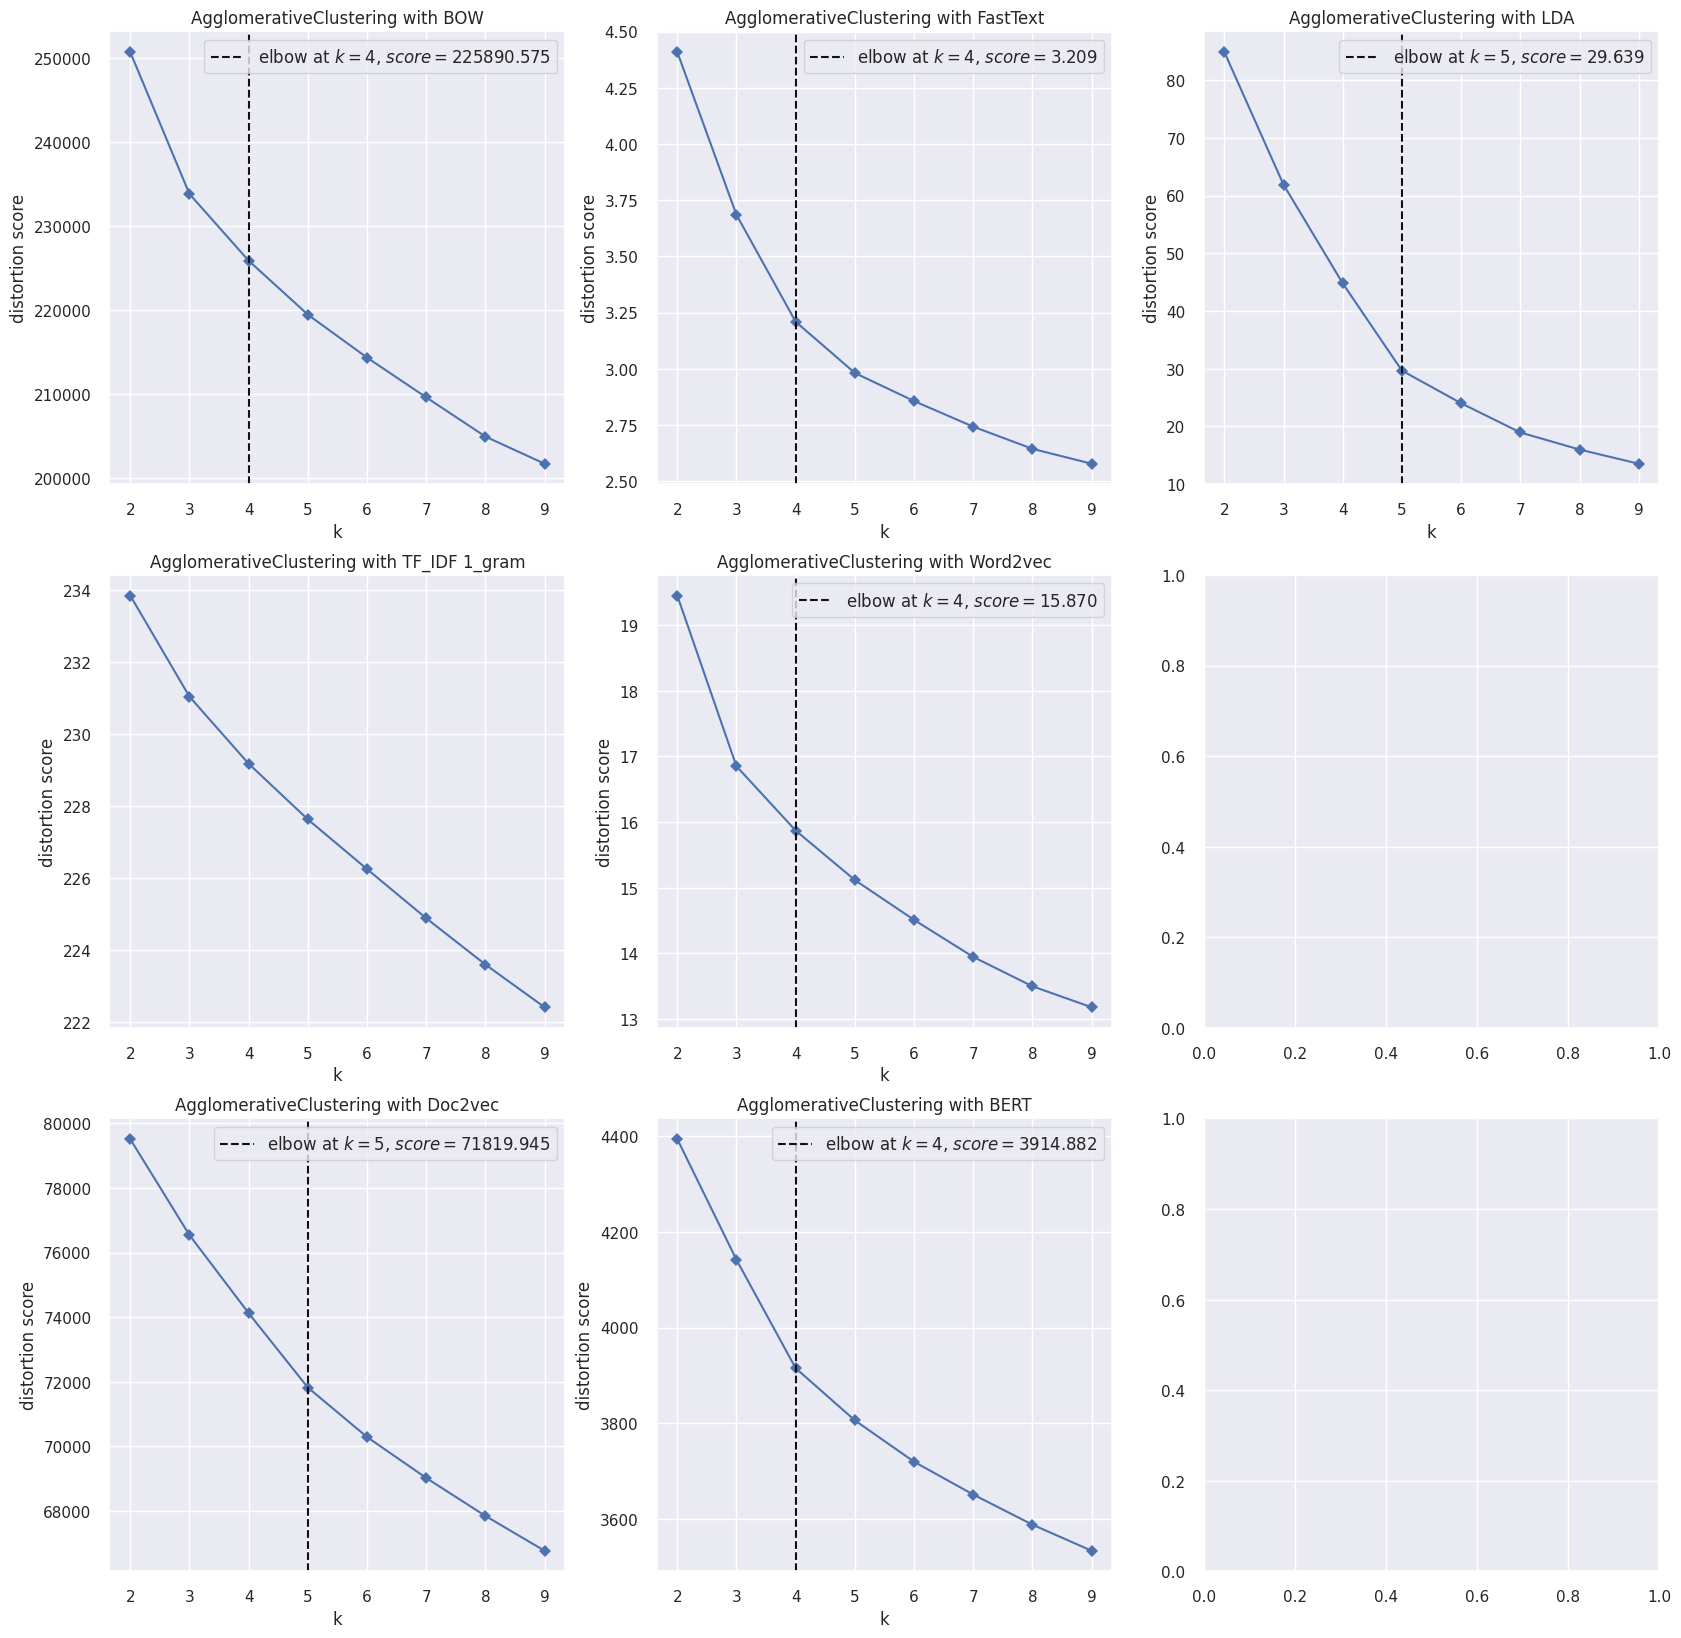

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt
# from yellowbrick.features import FeatureImportances
# from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC
# from sklearn.linear_model import LogisticRegression

x_size , y_size =3,3
fig, axes = plt.subplots(3, 3,figsize=(20,20))

model = AgglomerativeClustering()

visualgrid = []
for i in range(len(text_embedding.keys())):
    ax = axes[i%x_size][i//y_size]
    ax.set_title(text_embedding.keys())
    visualgrid.append(KElbowVisualizer(model, k=(2,10), metric='distortion', timings=False, ax=axes[i%x_size][i//y_size], title = type(model).__name__ + ' with ' + list(text_embedding.keys())[i]))

for vis,key in zip(visualgrid,text_embedding.keys()):
    vis.fit(text_embedding[key])
    vis.ax.set_title(key)
    vis.finalize()

plt.show()

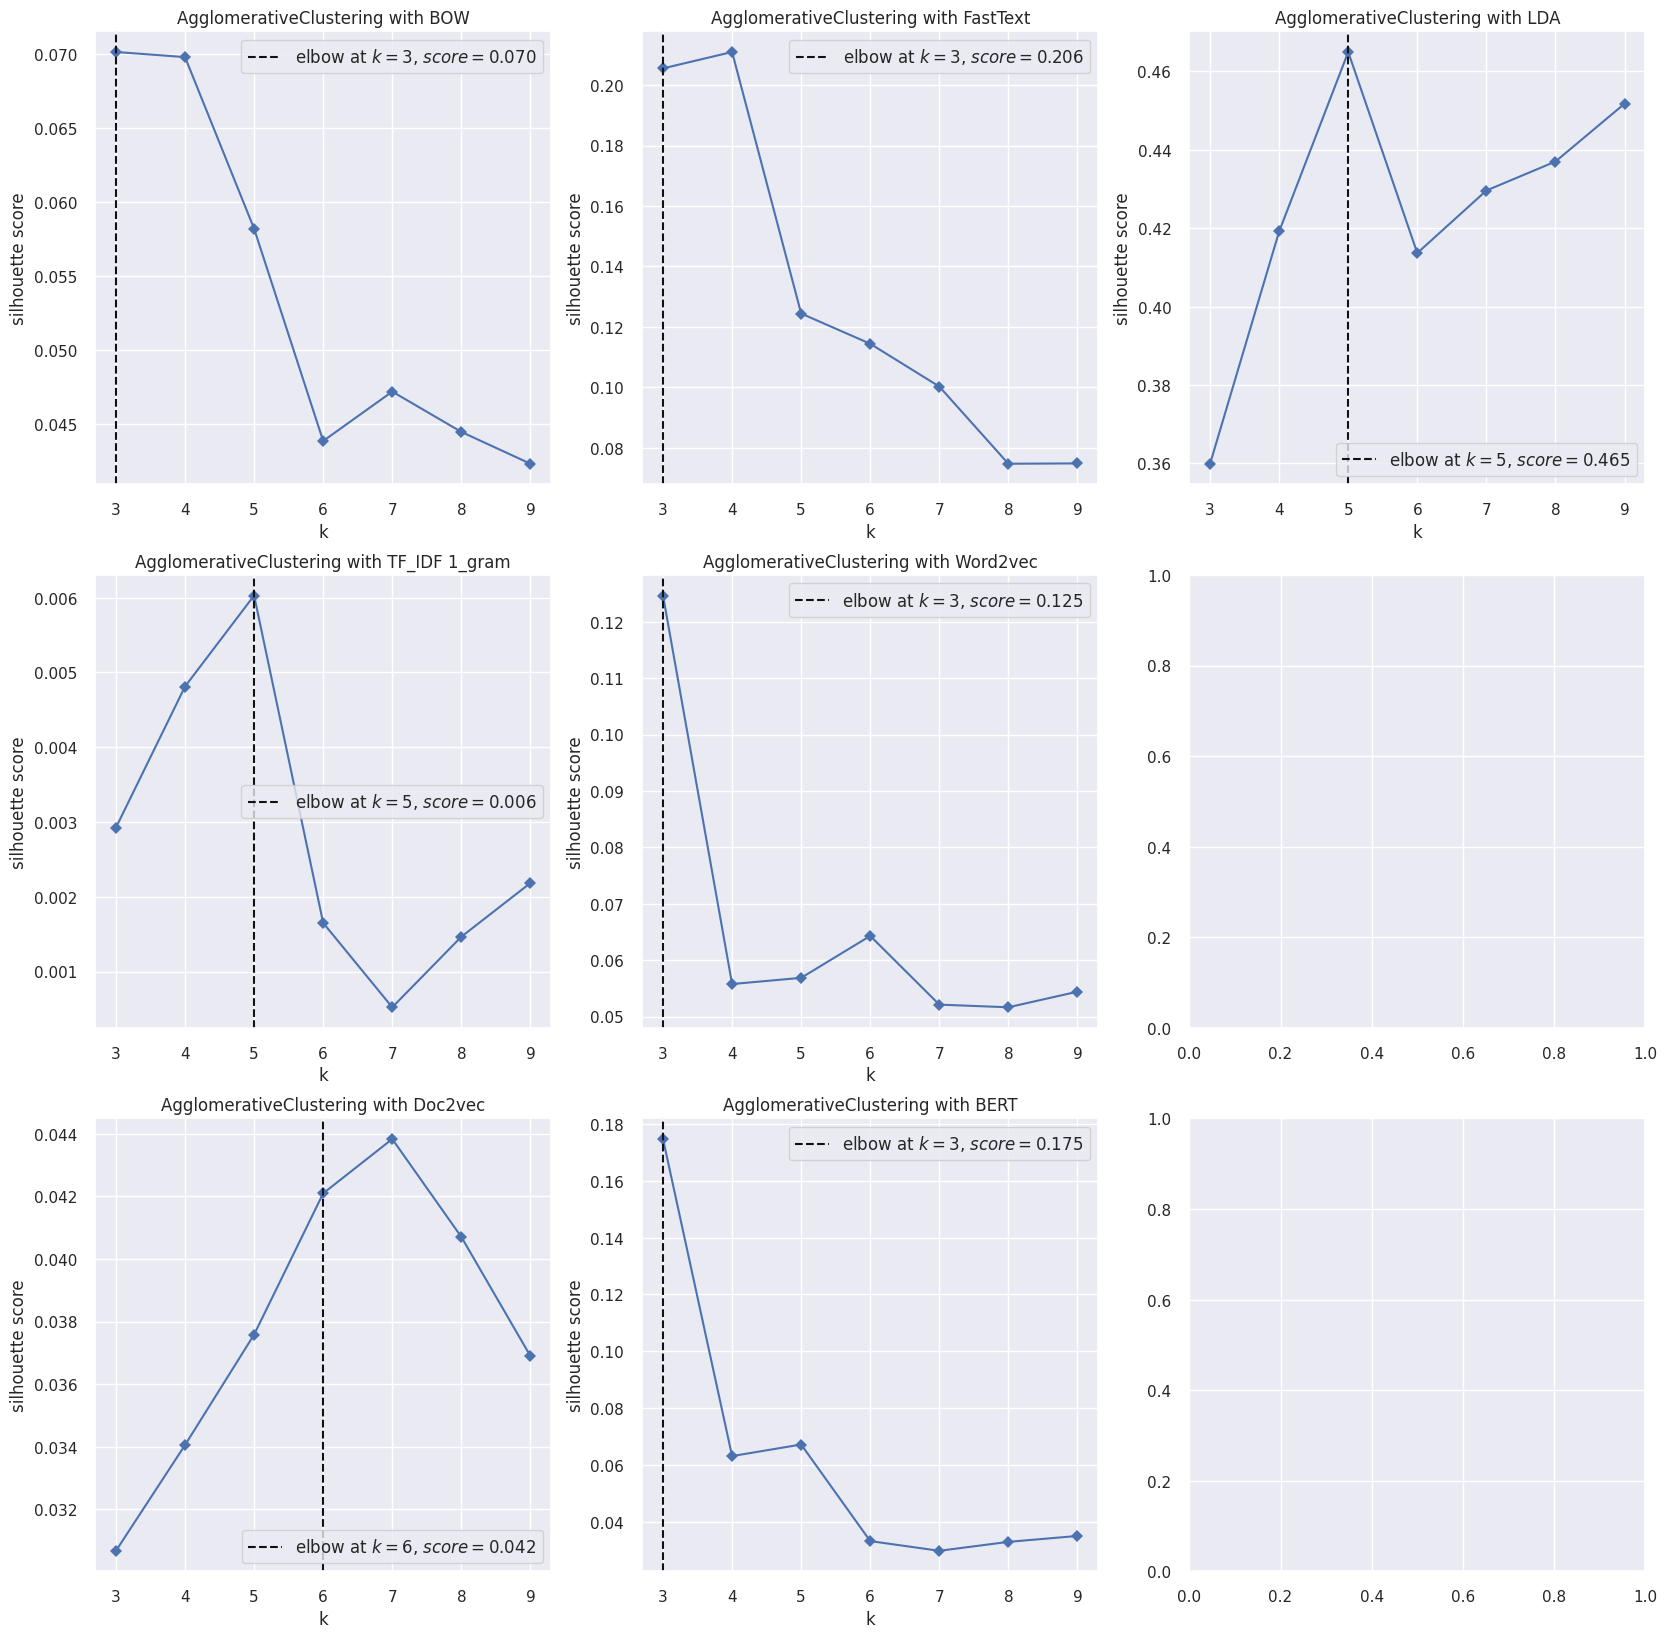

In [ ]:
import matplotlib.pyplot as plt

x_size , y_size =3,3
fig, axes = plt.subplots(3, 3,figsize=(20,20))
model = AgglomerativeClustering()

visualgrid = []
for i in range(len(text_embedding.keys())):
    ax = axes[i%x_size][i//y_size]
    ax.set_title(text_embedding.keys())
    visualgrid.append(KElbowVisualizer(model, k=(3,10), metric='silhouette', timings=False, ax=axes[i%x_size][i//y_size], title = type(model).__name__ + ' with ' + list(text_embedding.keys())[i]))

for vis,key in zip(visualgrid,text_embedding.keys()):
    vis.fit(text_embedding[key])
    vis.ax.set_title(key)
    vis.finalize()

plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

models = [AgglomerativeClustering(n_clusters=5),
          # Birch(n_clusters=5),
          # MiniBatchKMeans(n_clusters=5),
          # KMeans(n_clusters=5),
          # SpectralClustering(n_clusters=5)
          ]

models_scores = {}
for model in models:
    print(type(model).__name__)
    kappa_scores = {}
    for key in text_embedding.keys():
        clustering = model.fit(text_embedding[key])
        df_labels = pd.DataFrame({'y_actual':y_df['y_actual'], 'y_pred':clustering.labels_})
        df_labels['y_pred'] = df_labels['y_pred'].apply(lambda val: label_mapping(num=val,y_actual = 'y_actual',y_target='y_pred',df_labels=df_labels ))
        df_labels['y_pred']=df_labels['y_pred'].apply(lambda x: x-1000 if x>20 else x)
        kappa_score = cohen_kappa_score(df_labels['y_actual'], df_labels['y_pred'])
        kappa_scores[key] = kappa_score
        print(key, ':', kappa_score)
    models_scores[type(model).__name__] = kappa_scores

AgglomerativeClustering
BOW : 0.006688963210702337
TF_IDF 1_gram : 0.010033444816053283
Doc2vec : 0.006688963210702559
FastText : 0.006688963210702337
Word2vec : 0.0033444816053509463
BERT : 0.010033444816053505
LDA : 0.010033444816053727


In [ ]:
for model_scores,model in zip(models_scores.keys(),models):
    fig = go.Figure()
    obj = go.Bar(x = list(models_scores[model_scores].keys()), y = list(models_scores[model_scores].values()))
    fig.add_trace(obj)
    fig.update_layout(title={'text':f'Kappa Score of the {type(model).__name__}','x':0.5},height=600,width=800)
    fig.show()

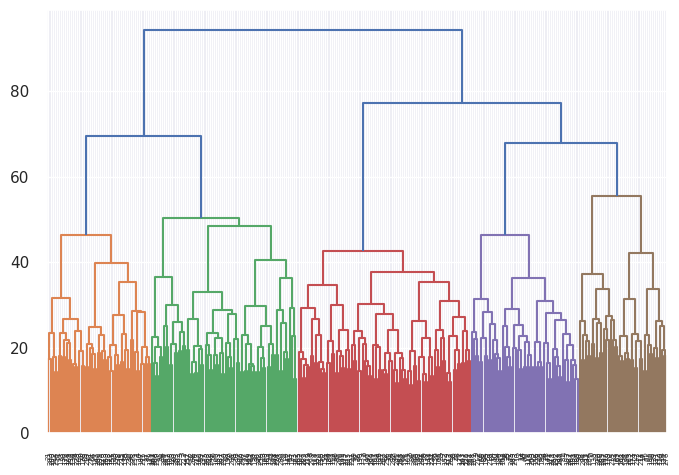

In [ ]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

dendrogram = sch.dendrogram(sch.linkage(text_embedding['Doc2vec'], method='ward'))
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(text_embedding['Doc2vec'])

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
k=4
embedding=text_embedding['Doc2vec']
model =GaussianMixture(n_components=k,random_state=seed)

y_pred =model.fit_predict(embedding)
#mapping
mapping_df=pd.DataFrame({'y_actual':y_actual,'y_pred':y_pred})
mapping_df['y_pred']=mapping_df['y_pred'].apply(lambda x: label_mapping(x, 'y_actual', 'y_pred', mapping_df))
mapping_df['y_pred']=mapping_df['y_pred'].apply(lambda x: x-1000 if x >20 else x )
# mapping_df=lab(mapping_df)
wrong_examples_pred_actual=mapping_df[mapping_df['y_actual']!=mapping_df['y_pred']]
wrong_idx=mapping_df[mapping_df['y_actual']!=mapping_df['y_pred']].index.tolist()
# print(wrong_idx)
wrong_examples_pred_actual['samples']=list(embedding[wrong_idx,:])

books=pd.DataFrame()
books['labels']=y_actual
books['samples']=list(embedding)
book_means=books.groupby('labels').mean()
wrong_smi=[]
correct_smi=[]
for i in range(len(wrong_examples_pred_actual)):
    true_book=book_means.loc[wrong_examples_pred_actual.iloc[i][0]][:][0].reshape(1,-1)
    wrong_book=book_means.loc[wrong_examples_pred_actual.iloc[i][1]][:][0].reshape(1,-1)
    sample=wrong_examples_pred_actual.iloc[i][2][:].reshape(1,-1)

    wrong_similarity = cosine_similarity(sample, wrong_book)
    right_similarity = cosine_similarity(sample, true_book)
    wrong_smi.append(wrong_similarity[0][0])
    correct_smi.append(right_similarity[0][0])
wrong_examples_pred_actual['Wrong Similarity']=wrong_smi
wrong_examples_pred_actual['Correct Similarity']=correct_smi
wrong_examples_pred_actual

,y_actual,y_pred,samples,Wrong Similarity,Correct Similarity
0,168,0,"[-3.0196967, -5.9991064, -4.83597, 2.5984585, ...",0.368572,1.000000
1,112,1,"[-4.565724, -1.632276, -2.8951933, 0.71863717,...",0.332267,1.000000
2,107,0,"[-0.6691421, -1.4164356, -5.3313065, -0.251958...",0.251767,1.000000
3,106,1,"[0.45151785, -4.8928366, -3.967276, 1.3112136,...",0.427963,1.000000
4,74,1,"[-4.1755104, -6.851195, -3.9715188, 0.03266104...",0.540671,0.672921
...,...,...,...,...,...
295,133,0,"[1.092986, -3.5186126, 0.28786135, 3.1056104, ...",0.336673,1.000000
296,190,0,"[0.8063175, -3.5587623, -0.6492851, -0.6413488...",0.473906,1.000000
297,224,1,"[-0.55720454, -5.386592, -3.2154443, 0.0272233...",0.226356,0.803969
298,125,1,"[1.8503519, -5.3815107, -1.9797012, 2.278869, ...",0.234082,1.000000
